In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')

Full description of dataset can be found in 06a notebook. This dataset is related to white wine samples. Features are the same like in the case of red wine. The main differences are:
- more samples (in red wine dataset number of samples was 1599, and here are 4898 samples),
- more quality categories (in red wine dataset was 6 categories from 3 to 8, here are 7 categories from 3 to 9)
- 9 point category contains only 5 samples, what makes SMOTE technique impossible to use, it was neccessary to merge 8 and 9 points categories,

In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white_wine.shape

(4898, 12)

In [6]:
white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<H3>Target variable</H3>

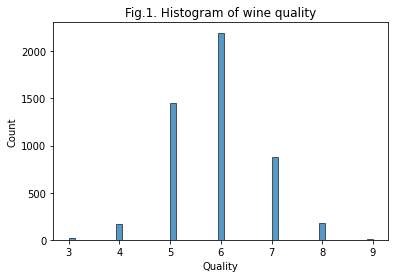

In [8]:
sns.histplot(data=white_wine, x='quality')
plt.xlabel('Quality')
plt.title('Fig.1. Histogram of wine quality')
plt.show()

In [9]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

<H3>Correlation with target</H3>

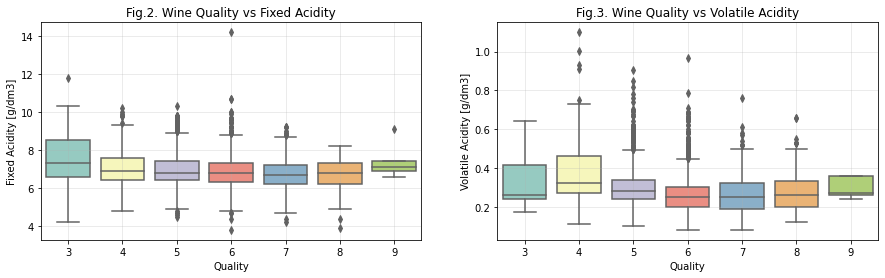

In [10]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x=white_wine['quality'], y=white_wine['fixed acidity'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity [g/dm3]')
plt.title('Fig.2. Wine Quality vs Fixed Acidity')
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
sns.boxplot(x=white_wine['quality'], y=white_wine['volatile acidity'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity [g/dm3]')
plt.title('Fig.3. Wine Quality vs Volatile Acidity')
plt.grid(alpha = 0.3)
plt.show()

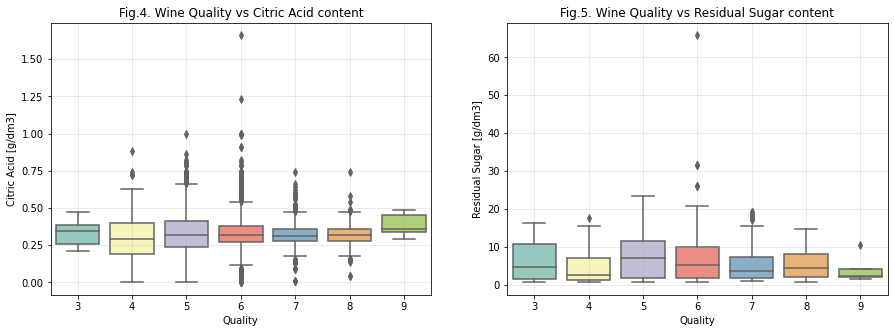

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=white_wine['quality'], y=white_wine['citric acid'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Citric Acid [g/dm3]')
plt.title('Fig.4. Wine Quality vs Citric Acid content')
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
sns.boxplot(x=white_wine['quality'], y=white_wine['residual sugar'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Residual Sugar [g/dm3]')
plt.title('Fig.5. Wine Quality vs Residual Sugar content')
plt.grid(alpha = 0.3)
plt.show()

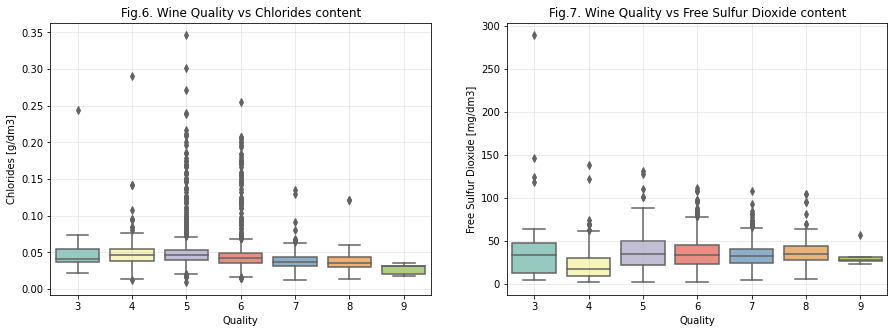

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=white_wine['quality'], y=white_wine['chlorides'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Chlorides [g/dm3]')
plt.grid(alpha = 0.3)
plt.title('Fig.6. Wine Quality vs Chlorides content')
plt.subplot(1,2,2)
sns.boxplot(x=white_wine['quality'], y=white_wine['free sulfur dioxide'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Free Sulfur Dioxide [mg/dm3]')
plt.title('Fig.7. Wine Quality vs Free Sulfur Dioxide content')
plt.grid(alpha = 0.3)
plt.show()

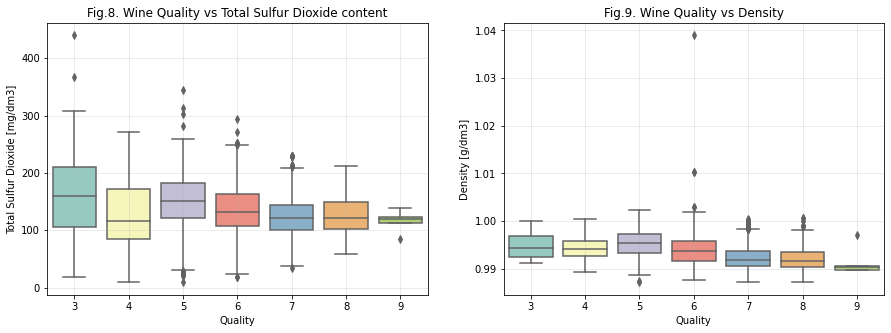

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=white_wine['quality'], y=white_wine['total sulfur dioxide'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Total Sulfur Dioxide [mg/dm3]')
plt.title('Fig.8. Wine Quality vs Total Sulfur Dioxide content')
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
sns.boxplot(x=white_wine['quality'], y=white_wine['density'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Density [g/dm3]')
plt.title('Fig.9. Wine Quality vs Density')
plt.grid(alpha = 0.3)

plt.show()

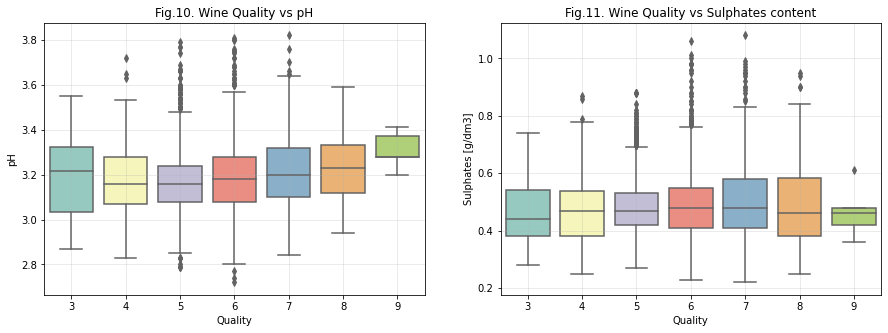

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=white_wine['quality'], y=white_wine['pH'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title('Fig.10. Wine Quality vs pH')
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
sns.boxplot(x=white_wine['quality'], y=white_wine['sulphates'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Sulphates [g/dm3]')
plt.title('Fig.11. Wine Quality vs Sulphates content')
plt.grid(alpha = 0.3)
plt.show()

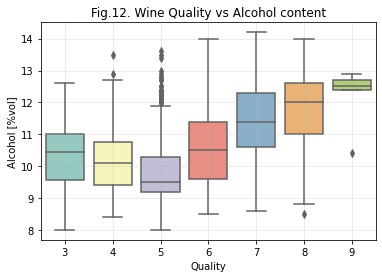

In [15]:
sns.boxplot(x=white_wine['quality'], y=white_wine['alcohol'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Alcohol [%vol]')
plt.title('Fig.12. Wine Quality vs Alcohol content')
plt.grid(alpha = 0.3)
plt.show()

Correlated features
- idea and code based on notebook from Kaggle, author YANA DAV (https://www.kaggle.com/yanadav/eda-preprocessing-linear-regression/notebook#Linear-Regression)

<AxesSubplot:>

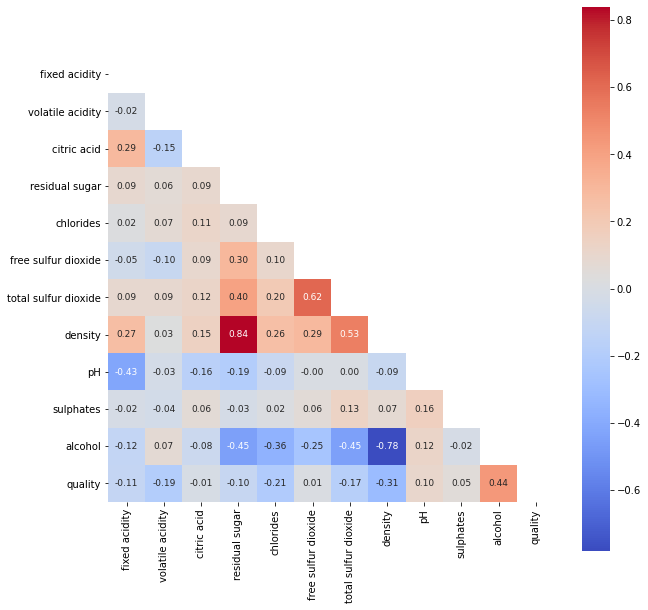

In [16]:
num_corr = white_wine.corr()
corr_triu = num_corr.where(np.triu(np.ones(num_corr.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(num_corr,annot=True, square=True, fmt='.2f',\
            annot_kws={'size':9}, mask = np.triu(corr_triu), cmap= "coolwarm")

- Correlation of particular features with target is smaller than in the case of red wine, it is more difficult to identify patterns.


In [17]:
#cols_to_drop = ['residual sugar']
#white_wine.drop(cols_to_drop, axis=1, inplace=True)
#white_wine.head()

<H3>Target variable imbalance</H3>

In [18]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Because there are small numbers of samples with 9 points, SMOTE method doesn't work. I this case groups 8 and 9 points will be combined. 

In [19]:
white_wine['quality'].replace({9: 8}, inplace=True)

<H3>Splitting data</H3>

In [20]:
X = white_wine.iloc[:, 0:-1]
Y = white_wine.iloc[:, -1:]

In [21]:
X_columns=X.columns

In [22]:
Y.value_counts()

quality
6          2198
5          1457
7           880
8           180
4           163
3            20
dtype: int64

<H3>SMOTE</H3>

In [23]:
from imblearn.over_sampling import SMOTE
X, Y = SMOTE().fit_resample(X, Y)

In [24]:
Y.value_counts()

quality
3          2198
4          2198
5          2198
6          2198
7          2198
8          2198
dtype: int64

<H3>Train/Test Split</H3>

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

In [26]:
print(len(Y_train),len(Y_test))

9891 3297


<H3>Linear regression</H3>

In [27]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(X_train, Y_train)
y_pred=LR_model.predict(X_test)

In [28]:
print('Training set score: %.3f' % LR_model.score(X_train,Y_train))

Training set score: 0.354


In [29]:
print('Test set score: %.3f' % LR_model.score(X_test,Y_test))

Test set score: 0.312


<H3>Classification models</H3>

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
mlr_model = LogisticRegression(multi_class="multinomial", max_iter=10000)
mlr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [32]:
mlr_predictions = mlr_model.predict(X_train)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, mlr_predictions))

              precision    recall  f1-score   support

           3       0.47      0.44      0.45      1650
           4       0.53      0.63      0.58      1642
           5       0.40      0.43      0.41      1651
           6       0.30      0.21      0.25      1639
           7       0.39      0.30      0.34      1629
           8       0.44      0.58      0.50      1680

    accuracy                           0.43      9891
   macro avg       0.42      0.43      0.42      9891
weighted avg       0.42      0.43      0.42      9891



In [34]:
mlr_pred = mlr_model.predict(X_test)
print(classification_report(Y_test, mlr_pred))

              precision    recall  f1-score   support

           3       0.46      0.45      0.46       548
           4       0.55      0.63      0.59       556
           5       0.36      0.41      0.39       547
           6       0.29      0.20      0.24       559
           7       0.36      0.27      0.31       569
           8       0.41      0.55      0.47       518

    accuracy                           0.42      3297
   macro avg       0.41      0.42      0.41      3297
weighted avg       0.41      0.42      0.41      3297



In [35]:
from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(mlr_pred,Y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 41.73%


<H3>K-Nearest Neighbors</H3> 

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
accuracies = []
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, Y_train)
    accuracies.append(classifier.score(X_train, Y_train))

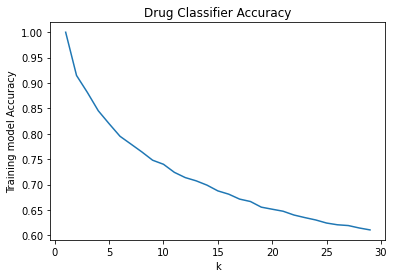

In [38]:
k_list = range(1,30)
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Training model Accuracy')
plt.title('Drug Classifier Accuracy')
plt.show()

<H4>Model testing</H4>

In [39]:
accuracies_test = []
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, Y_train)
    accuracies_test.append(classifier.score(X_test,Y_test))

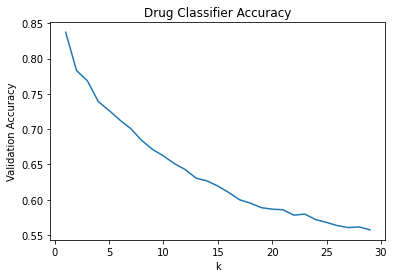

In [40]:
plt.plot(k_list, accuracies_test)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Drug Classifier Accuracy')
plt.show()

In [41]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)

In [42]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           3       0.80      0.92      0.85       548
           4       0.77      0.91      0.83       556
           5       0.58      0.53      0.55       547
           6       0.58      0.33      0.42       559
           7       0.72      0.77      0.74       569
           8       0.81      0.92      0.86       518

    accuracy                           0.73      3297
   macro avg       0.71      0.73      0.71      3297
weighted avg       0.71      0.73      0.71      3297



In [43]:
kNNAcc = accuracy_score(knn_pred,Y_test)
print('kNN model accuracy is: {:.2f}%'.format(kNNAcc*100))

kNN model accuracy is: 72.64%


<H3>Decision tree</H3>

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state = 42, max_depth=12)
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

In [45]:
predictions = tree_model.predict(X_test)

In [46]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           3       0.87      0.96      0.91       548
           4       0.82      0.76      0.79       556
           5       0.54      0.62      0.58       547
           6       0.52      0.38      0.44       559
           7       0.65      0.57      0.61       569
           8       0.69      0.85      0.76       518

    accuracy                           0.69      3297
   macro avg       0.68      0.69      0.68      3297
weighted avg       0.68      0.69      0.68      3297



In [47]:
TreeAcc = accuracy_score(predictions,Y_test)
print('Decision tree model accuracy is: {:.2f}%'.format(TreeAcc*100))

Decision tree model accuracy is: 68.73%


<H3>Random forest</H3>

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train,Y_train)
forest_pred=forest.predict(X_test)

In [49]:
print(classification_report(Y_test, forest_pred))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       548
           4       0.90      0.98      0.94       556
           5       0.79      0.80      0.79       547
           6       0.77      0.61      0.68       559
           7       0.81      0.87      0.84       569
           8       0.93      0.96      0.94       518

    accuracy                           0.87      3297
   macro avg       0.86      0.87      0.86      3297
weighted avg       0.86      0.87      0.86      3297



In [50]:
ForestAcc = accuracy_score(forest_pred,Y_test)
print('Random forest model accuracy is: {:.2f}%'.format(ForestAcc*100))

Random forest model accuracy is: 86.75%


<H3>Categorizing target value</H3>

In [51]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [52]:
white_wine['quality'].replace({3: 'Poor', 4: 'Poor', 5:'Average',6:'Average',7:'Good',8:'Good'}, inplace=True)

In [53]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Average
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Average
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Average
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Average
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Average


In [54]:
X_cat = white_wine.iloc[:, 0:-1]
Y_cat = white_wine.iloc[:, -1:]

<H3>Balancing new dataset</H3>

In [55]:
X_cat, Y_cat = SMOTE().fit_resample(X_cat, Y_cat)

In [56]:
Y_cat.value_counts()

quality
Average    3655
Good       3655
Poor       3655
dtype: int64

<H3>Train/Test Split</H3>

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X_cat, Y_cat, test_size=0.25, random_state = 42)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

<H3>Multinomial logistic regression</H3>

In [58]:
cat_lr_model = LogisticRegression(multi_class="multinomial", max_iter=7000)
cat_lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=7000, multi_class='multinomial')

In [59]:
cat_lr_predictions = cat_lr_model.predict(x_train)

In [60]:
print(classification_report(y_train, cat_lr_predictions))

              precision    recall  f1-score   support

     Average       0.52      0.46      0.49      2724
        Good       0.67      0.77      0.72      2757
        Poor       0.71      0.69      0.70      2742

    accuracy                           0.64      8223
   macro avg       0.63      0.64      0.63      8223
weighted avg       0.63      0.64      0.64      8223



In [61]:
cat_lr_pred = cat_lr_model.predict(x_test)
print(classification_report(y_test, cat_lr_pred))

              precision    recall  f1-score   support

     Average       0.52      0.47      0.49       931
        Good       0.65      0.73      0.69       898
        Poor       0.71      0.68      0.70       913

    accuracy                           0.63      2742
   macro avg       0.63      0.63      0.63      2742
weighted avg       0.63      0.63      0.63      2742



In [62]:
LRAcc = accuracy_score(cat_lr_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 62.95%


<H3>K-Nearest Neighbors</H3>

In [63]:
cat_accuracies = []
for k in range(1,30):
    cat_classifier = KNeighborsClassifier(n_neighbors = k)
    cat_classifier.fit(x_train, y_train)
    cat_accuracies.append(cat_classifier.score(x_train, y_train))

In [64]:
cat_k_list = range(1,30)

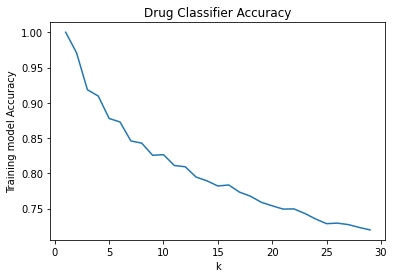

In [65]:
plt.plot(cat_k_list, cat_accuracies)
plt.xlabel('k')
plt.ylabel('Training model Accuracy')
plt.title('Drug Classifier Accuracy')
plt.show()

<H4>Model testing</H4>

In [66]:
cat_accuracies_test = []
for k in range(1,30):
    cat_classifier = KNeighborsClassifier(n_neighbors = k)
    cat_classifier.fit(x_train, y_train)
    cat_accuracies_test.append(cat_classifier.score(x_test,y_test))

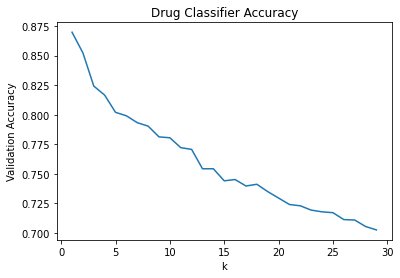

In [67]:
plt.plot(cat_k_list, cat_accuracies_test)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Drug Classifier Accuracy')
plt.show()

In [68]:
cat_knn_model = KNeighborsClassifier(n_neighbors = 4)
cat_knn_model.fit(x_train, y_train)
cat_knn_pred = cat_knn_model.predict(x_test)

In [69]:
print(classification_report(y_test, cat_knn_pred))

              precision    recall  f1-score   support

     Average       0.80      0.68      0.73       931
        Good       0.78      0.86      0.82       898
        Poor       0.87      0.92      0.89       913

    accuracy                           0.82      2742
   macro avg       0.82      0.82      0.81      2742
weighted avg       0.82      0.82      0.81      2742



In [70]:
kNNAcc = accuracy_score(cat_knn_pred,y_test)
print('kNN model accuracy is: {:.2f}%'.format(kNNAcc*100))

kNN model accuracy is: 81.66%


<H3>Decision tree</H3>

In [71]:
from sklearn.tree import DecisionTreeClassifier
cat_tree_model = DecisionTreeClassifier(random_state = 42, max_depth=12)
cat_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

In [72]:
predictions = cat_tree_model.predict(x_test)

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     Average       0.77      0.62      0.69       931
        Good       0.76      0.87      0.81       898
        Poor       0.87      0.91      0.89       913

    accuracy                           0.80      2742
   macro avg       0.80      0.80      0.80      2742
weighted avg       0.80      0.80      0.79      2742



In [74]:
TreeAcc = accuracy_score(predictions,y_test)
print('Decision tree model accuracy is: {:.2f}%'.format(TreeAcc*100))

Decision tree model accuracy is: 79.94%


<H3>Random forest</H3>

In [75]:
from sklearn.ensemble import RandomForestClassifier
cat_forest=RandomForestClassifier(n_estimators=100, random_state=42)
cat_forest.fit(x_train,y_train)
cat_forest_pred=cat_forest.predict(x_test)

In [76]:
print(classification_report(y_test, cat_forest_pred))

              precision    recall  f1-score   support

     Average       0.90      0.84      0.87       931
        Good       0.89      0.92      0.91       898
        Poor       0.95      0.97      0.96       913

    accuracy                           0.91      2742
   macro avg       0.91      0.91      0.91      2742
weighted avg       0.91      0.91      0.91      2742



In [77]:
ForestAcc = accuracy_score(cat_forest_pred,y_test)
print('Random forest model accuracy is: {:.2f}%'.format(ForestAcc*100))

Random forest model accuracy is: 91.10%


In [78]:
import eli5
from eli5.sklearn import PermutationImportance

In [79]:
cat_tree_perm = PermutationImportance(cat_tree_model, random_state=1).fit(x_test, y_test)
eli5.show_weights(cat_tree_perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.2397 ± 0.0218,alcohol
0.1701 ± 0.0092,free sulfur dioxide
0.1529 ± 0.0161,volatile acidity
0.1354 ± 0.0073,total sulfur dioxide
0.1074 ± 0.0135,residual sugar
0.0937 ± 0.0073,chlorides
0.0923 ± 0.0042,fixed acidity
0.0646 ± 0.0052,density
0.0582 ± 0.0062,citric acid
0.0460 ± 0.0043,sulphates


In [80]:
cat_forest_perm = PermutationImportance(cat_forest, random_state=1).fit(x_test, y_test)
eli5.show_weights(cat_forest_perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.2026 ± 0.0150,alcohol
0.1562 ± 0.0125,free sulfur dioxide
0.1298 ± 0.0073,volatile acidity
0.0956 ± 0.0049,total sulfur dioxide
0.0808 ± 0.0096,chlorides
0.0648 ± 0.0051,density
0.0567 ± 0.0061,residual sugar
0.0435 ± 0.0071,fixed acidity
0.0416 ± 0.0063,citric acid
0.0274 ± 0.0018,sulphates


In both models the most important features are:
- Alcohol content,
- Free Sulfur Dioxide content,
- Volatile acidity (acetic acid content).

Those data don't fit to correlation data where the most important features are:
- Alcohol content (correlation coefficient 0.44),
- Density (coeff. -0.31),
- Chlorides (coeff -0.21).


<H3>Comparison of wine physicochemical features influencing sensory rating of white and red wine.</H3>

In the case of <u>red wine</u>, the most important features are:
- Alcohol content,
- <U>Sulphates (potassium sulphate) content</U>,
- Volatile acidity (acetic acid content).

In the case of <u>white wine</u> the most impoertant features are:
- Alcohol content,
- <U>Free Sulfur Dioxide content</U>,
- Volatile acidity (acetic acid content).
    